In [4]:
#Load all dependecies
import numpy as np
import tensorflow as tf
import keras
import keras.datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
bs = 32 #batch size
ne = 50 #number of epochs

In [6]:
cifarc10 = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [7]:
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [8]:
# load train and test dataset
#def load_dataset():
	# load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
	# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#return x_train, y_train, x_test, y_test

In [9]:
x_train, x_test = prep_pixels(x_train, x_test)

In [10]:
print(x_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 10)


NET A

In [11]:
#Neural network
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(10))

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


In [12]:
optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.1, cooldown=2)

In [14]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(x_train)
val_datagen = ImageDataGenerator()
val_datagen.fit(x_test)

In [15]:
history1 = model1.fit_generator(train_datagen.flow(x_train,y_train, batch_size=bs),
                              epochs = ne, validation_data = val_datagen.flow(x_test, y_test),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // bs), 
                              validation_steps=(x_test.shape[0] // bs))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 42s 17ms/step - loss: 8.1513 - accuracy: 0.1064 - val_loss: 8.2659 - val_accuracy: 0.0998
Epoch 2/50
1562/1562 [==============================] - 25s 16ms/step - loss: 8.4387 - accuracy: 0.1026 - val_loss: 8.4450 - val_accuracy: 0.0994
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 8.3051 - accuracy: 0.1000 - val_loss: 8.6435 - val_accuracy: 0.0996
Epoch 4/50
1562/1562 [==============================] - 25s 16ms/step - loss: 8.3420 - accuracy: 0.1028 - val_loss: 8.8470 - val_accuracy: 0.1154
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 8.3207 - accuracy: 0.1179 - val_loss: 8.3319 - val_accuracy: 0.1118
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 8.2989 - accuracy: 0.1139 - val_loss: 8.3400 - val_accuracy: 0.1117
Epoch 7/50
1562/1562 [==============================] - 27s 17ms/step - loss: 8.3284 - accuracy: 0.1152 - val_loss: 8.2463 -

In [17]:
model1.save("netA.h5")

In [18]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


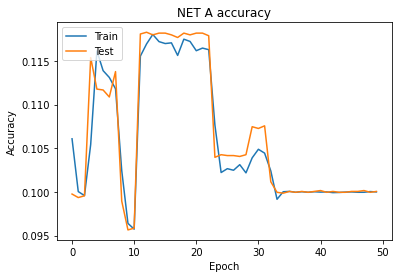

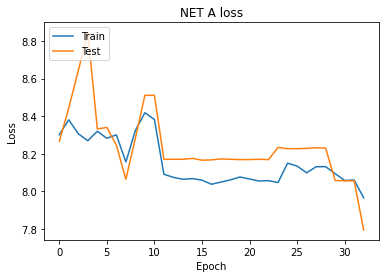

In [19]:
#plot acc and test
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('NET A accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss']) 
plt.title('NET A loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

NET B

In [20]:
#Neural network
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(300, activation='relu' ))
model2.add(Dense(10))

In [25]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, None)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               921900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 924,910
Trainable params: 924,910
Non-trainable params: 0
_________________________________________________________________


In [21]:
#optimizer = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False, )
model2.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

In [22]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.0001, cooldown=2)

In [23]:
train_datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, fill_mode='nearest')

train_datagen.fit(x_train)
val_datagen = ImageDataGenerator()
val_datagen.fit(x_test)

In [24]:
history2 = model2.fit_generator(train_datagen.flow(x_train,y_train, batch_size=bs),
                              epochs = ne, validation_data = val_datagen.flow(x_test, y_test),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // bs), 
                              validation_steps=(x_test.shape[0] // bs))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 26s 16ms/step - loss: 8.3407 - accuracy: 0.1008 - val_loss: 8.0623 - val_accuracy: 0.1000
Epoch 2/50
1562/1562 [==============================] - 26s 17ms/step - loss: 8.1319 - accuracy: 0.1020 - val_loss: 8.0542 - val_accuracy: 0.1000
Epoch 3/50
1562/1562 [==============================] - 25s 16ms/step - loss: 8.0494 - accuracy: 0.1012 - val_loss: 8.0607 - val_accuracy: 0.0999
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 8.1331 - accuracy: 0.1002 - val_loss: 8.0607 - val_accuracy: 0.0999
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 8.0235 - accuracy: 0.0998 - val_loss: 8.0574 - val_accuracy: 0.0998
Epoch 6/50
1562/1562 [==============================] - 25s 16ms/step - loss: 8.0591 - accuracy: 0.1008 - val_loss: 8.0574 - val_accuracy: 0.0999
Epoch 7/50
1562/1562 [==============================] - 27s 17ms/step - loss: 8.0545 - accuracy: 0.0998 - val_loss: 8.0590 -

In [26]:
model2.save("netB.h5")

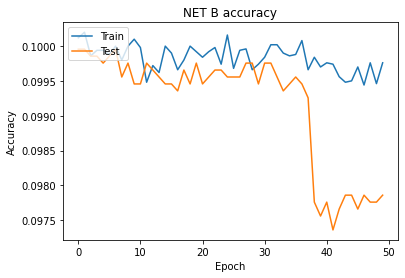

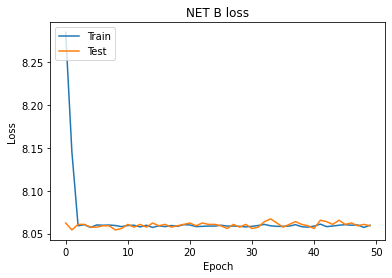

In [27]:
#plot acc and test
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('NET B accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.title('NET B loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

NET C

In [28]:
#Neural network
model3 = Sequential()
model3.add(Conv2D(25, kernel_size=5, activation='relu', input_shape=(32,32,3)))
model3.add(MaxPooling2D((2,2), strides=(2,2)))
model3.add(Flatten())
model3.add(Dense(10))

In [31]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 25)        1900      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 25)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                49010     
Total params: 50,910
Trainable params: 50,910
Non-trainable params: 0
_________________________________________________________________


In [29]:
model3.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [30]:
history3 = model3.fit_generator(train_datagen.flow(x_train,y_train, batch_size=bs),
                              epochs = ne, validation_data = val_datagen.flow(x_test, y_test),
                              verbose = 1, steps_per_epoch=(x_train.shape[0] // bs), 
                              validation_steps=(x_test.shape[0] // bs))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 41s 17ms/step - loss: 7.2176 - accuracy: 0.1008 - val_loss: 9.5943 - val_accuracy: 0.0953
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 9.6068 - accuracy: 0.0996 - val_loss: 9.6008 - val_accuracy: 0.0955
Epoch 3/50
1562/1562 [==============================] - 25s 16ms/step - loss: 9.6782 - accuracy: 0.1017 - val_loss: 9.5943 - val_accuracy: 0.0956
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 9.5937 - accuracy: 0.1028 - val_loss: 9.5943 - val_accuracy: 0.0954
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 9.6206 - accuracy: 0.1001 - val_loss: 9.6008 - val_accuracy: 0.0954
Epoch 6/50
1562/1562 [==============================] - 26s 16ms/step - loss: 9.5619 - accuracy: 0.1019 - val_loss: 9.5976 - val_accuracy: 0.0957
Epoch 7/50
1562/1562 [==============================] - 26s 17ms/step - loss: 9.5815 - accuracy: 0.0987 - val_loss: 9.5911 -

In [32]:
model3.save("netC.h5")

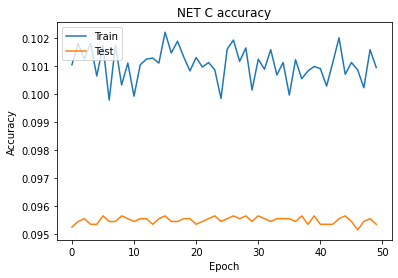

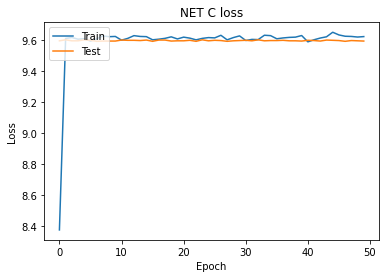

In [33]:
#plot acc and test
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('NET C accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history3.history['loss']) 
plt.plot(history3.history['val_loss']) 
plt.title('NET C loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Training accuracy of Net A is 11.3% and test accuracy is 11.1%
Training accuracy of Net B is 12.18% and test accuracy is 12.7%
Training accuracy of Net C is 9.8% and test accuracy is 9.8%


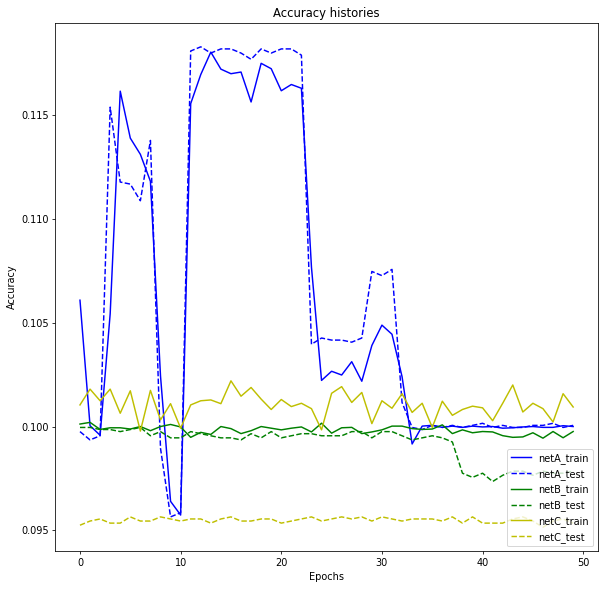

In [37]:
print("Training accuracy of Net A is 11.3% and test accuracy is 11.1%" '\n'
      "Training accuracy of Net B is 12.18% and test accuracy is 12.7%" '\n' "Training accuracy of Net C is 9.8% and test accuracy is 9.8%")

acc1_1 = np.array(history1.history['accuracy'])
acc1_2 = np.array(history1.history['val_accuracy'])
acc2_1 = np.array(history2.history['accuracy'])
acc2_2 = np.array(history2.history['val_accuracy'])
acc3_1 = np.array(history3.history['accuracy'])
acc3_2 = np.array(history3.history['val_accuracy'])

epochs = range(len(acc2_1))

plt.figure(figsize=(10,10), dpi=70)


# Plot training and validation accuracy per epoch
plt.plot(epochs, acc1_1, "-b", label = "netA_train", )
plt.plot(epochs, acc1_2, "-b", linestyle='dashed', label = "netA_test", )
plt.plot(epochs, acc2_1, "-g", label = "netB_train", )
plt.plot(epochs, acc2_2, "-g",linestyle='dashed', label = "netB_test", )
plt.plot(epochs, acc3_1, "-y", label = "netC_train", )
plt.plot(epochs, acc3_2, "-y",linestyle='dashed', label = "netC_test", )
plt.legend(loc="lower right")
plt.title('Accuracy histories')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()